<h1> Taxi Fare Prediction


In [72]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from math import radians, cos, sin, asin, sqrt

In [73]:
# function to measure the distance based on given long and latitude coordinates
def distance(lat1, lat2, lon1, lon2):
    
    # The math module contains a function named
    # radians which converts from degrees to radians.
    lon1 = radians(lon1)
    lon2 = radians(lon2)
    lat1 = radians(lat1)
    lat2 = radians(lat2)
    
    # Haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * asin(sqrt(a))
    # Radius of earth in kilometers. Use 3956 for miles
    r = 6371
    # calculate the result
    return(c * r)

<h1>Summary of of the model built and its result

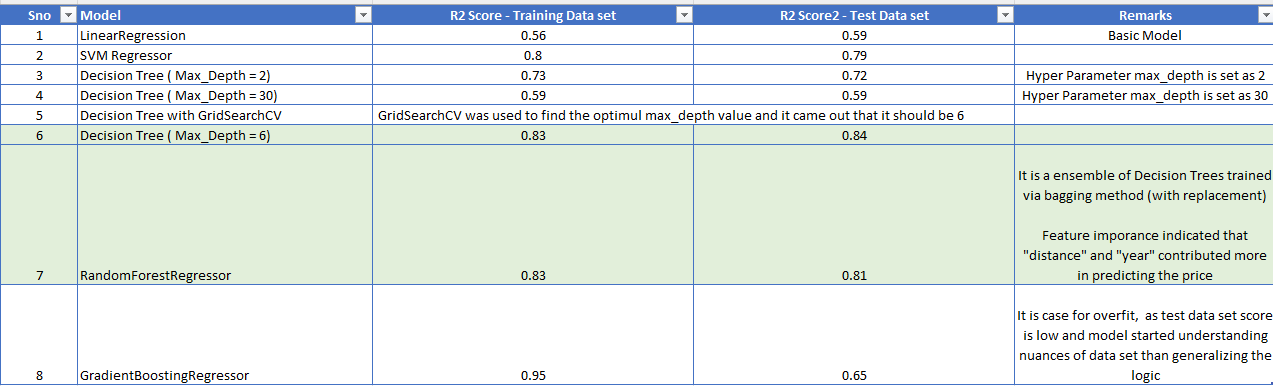

<b>Data Analysis

In [74]:
# load the csv file
df=pd.read_csv("TaxiFare.csv")

In [75]:
#df.to_csv('TaxiFare.csv')

In [76]:
# inspect if the data has been loaded correctly
df.head()

,Unnamed: 0,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [77]:
# verify the dataframe structure and check if there are any nullable records
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            50000 non-null  int64  
 1   unique_id             50000 non-null  object 
 2   amount                50000 non-null  float64
 3   date_time_of_pickup   50000 non-null  object 
 4   longitude_of_pickup   50000 non-null  float64
 5   latitude_of_pickup    50000 non-null  float64
 6   longitude_of_dropoff  50000 non-null  float64
 7   latitude_of_dropoff   50000 non-null  float64
 8   no_of_passenger       50000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 3.4+ MB


In [78]:
# verify the # of records and columns
df.shape

(50000, 9)

In [79]:
# Extract a new feature 'distance' as it will have great influence in deciding the taxi fare

df['distance'] = df.apply(lambda row: distance(row.latitude_of_pickup,row.latitude_of_dropoff,row.longitude_of_pickup,row.longitude_of_dropoff), axis =  1)

In [80]:
# verify if the distance feature is added and is correct
df.head()

,Unnamed: 0,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,distance
0,0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,1.030764
1,1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,8.450134
2,2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,1.389525
3,3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,2.799270
4,4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,1.999157


In [81]:
# Extract new feature year, month, day and hour of the taxi booking and it may have likely impact on the total fare

In [82]:
df['year'] = pd.DatetimeIndex(df['date_time_of_pickup']).year

In [83]:
df['month'] = pd.DatetimeIndex(df['date_time_of_pickup']).month

In [84]:
df['day'] = pd.DatetimeIndex(df['date_time_of_pickup']).day

In [85]:
df['hour'] = pd.DatetimeIndex(df['date_time_of_pickup']).hour

In [86]:
# verify the data in newly added features
df.head()

,Unnamed: 0,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,distance,year,month,day,hour
0,0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,1.030764,2009,6,15,17
1,1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,8.450134,2010,1,5,16
2,2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,1.389525,2011,8,18,0
3,3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,2.799270,2012,4,21,4
4,4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,1.999157,2010,3,9,7


In [87]:
# verify the statistics of the overall data
df.describe()

,Unnamed: 0,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,distance,year,month,day,hour
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,24999.500000,11.364171,-72.509756,39.933759,-72.504616,39.926251,1.667840,18.508946,2011.739260,6.273300,15.672040,13.489080
std,14433.901067,9.685557,10.393860,6.224857,10.407570,6.014737,1.289195,355.564309,1.862639,3.461157,8.660789,6.506935
min,0.000000,-5.000000,-75.423848,-74.006893,-84.654241,-74.006377,0.000000,0.000000,2009.000000,1.000000,1.000000,0.000000
25%,12499.750000,6.000000,-73.992062,40.734880,-73.991152,40.734371,1.000000,1.223146,2010.000000,3.000000,8.000000,9.000000
50%,24999.500000,8.500000,-73.981840,40.752678,-73.980082,40.753372,1.000000,2.120114,2012.000000,6.000000,16.000000,14.000000
75%,37499.250000,12.500000,-73.967148,40.767360,-73.963584,40.768167,2.000000,3.895570,2013.000000,9.000000,23.000000,19.000000
max,49999.000000,200.000000,40.783472,401.083332,40.851027,43.415190,6.000000,8667.818812,2015.000000,12.000000,31.000000,23.000000


In [88]:
# General observation on the overall stat of the data
#  1.  Amount field seem to have negative value,  which seems to be incorrect
#  2.  Amount field seem to have outlier, the max value is 200 which is way beyound mean value
#  3.  There are records where no_of_passenger is updated as zero
#  4.  There are records where distance travelled has value as zero
#  5.  distance field seem to have anamolies and it has max value as 360

# All these anomalies to be corrected

In [89]:
# Remove the feature that adds no value in overall model building
df=df.drop('unique_id',axis=1)
df=df.drop('date_time_of_pickup',axis=1)
df=df.drop('longitude_of_pickup',axis=1)
df=df.drop('latitude_of_pickup',axis=1)
df=df.drop('longitude_of_dropoff',axis=1)
df=df.drop('latitude_of_dropoff',axis=1)

In [90]:
df.head()

,Unnamed: 0,amount,no_of_passenger,distance,year,month,day,hour
0,0,4.5,1,1.030764,2009,6,15,17
1,1,16.9,1,8.450134,2010,1,5,16
2,2,5.7,2,1.389525,2011,8,18,0
3,3,7.7,1,2.799270,2012,4,21,4
4,4,5.3,1,1.999157,2010,3,9,7


<h2> Handle data  anamolies

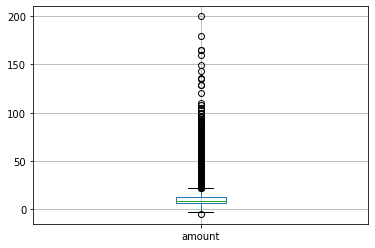

In [91]:
df.boxplot(column=['amount'])
plt.show()

In [92]:
# verify how many records has outlier value
df [df['amount'] >= 100]

,Unnamed: 0,amount,no_of_passenger,distance,year,month,day,hour
1335,1335,180.00,1,0.000000,2013,1,16,20
1483,1483,165.00,1,0.028489,2009,8,7,21
6630,6630,128.83,1,0.000000,2014,5,16,1
12349,12349,104.67,1,43.648755,2010,5,1,15
14142,14142,108.00,1,3.828609,2014,12,12,10
20886,20886,120.00,2,0.000000,2010,7,17,17
23659,23659,100.00,1,0.000000,2012,10,31,11
25201,25201,135.00,1,0.366888,2013,12,16,10
25799,25799,110.00,1,0.003638,2014,2,7,3
26027,26027,149.00,4,0.000790,2014,8,14,20


In [93]:
# verify the records thta has amount <=0
df [df['amount'] <= 0]

,Unnamed: 0,amount,no_of_passenger,distance,year,month,day,hour
2039,2039,-2.9,1,0.184225,2010,3,9,23
2486,2486,-2.5,1,0.021244,2015,3,22,5
10002,10002,0.0,1,3.184763,2010,2,15,14
13032,13032,-3.0,4,0.096377,2013,8,30,8
27891,27891,0.0,1,0.001064,2015,5,15,21
28839,28839,-2.5,1,8647.451783,2013,8,11,13
36722,36722,-2.5,1,0.352924,2015,4,30,15
42337,42337,-5.0,1,0.958127,2015,3,9,10
47302,47302,0.0,1,0.018420,2010,3,18,19


In [94]:
# Remove amount field anamolies
df = df [df['amount'] > 0]
df = df [df['amount'] <= 100]

In [95]:
df.shape

(49975, 8)

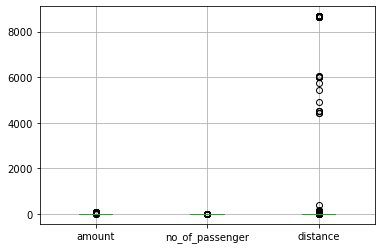

In [96]:
df.boxplot(column=['amount','no_of_passenger','distance'])
plt.show()

In [97]:
# verify the records that zero as value in no_of_passenger
df [df['no_of_passenger'] <= 0]

,Unnamed: 0,amount,no_of_passenger,distance,year,month,day,hour
314,314,34.0,0,15.577567,2015,6,2,23
566,566,4.9,0,1.020108,2012,1,28,21
678,678,6.5,0,2.426752,2012,2,27,7
1160,1160,13.3,0,6.003251,2011,5,25,23
1935,1935,10.1,0,2.950300,2011,10,23,11
...,...,...,...,...,...,...,...,...
47372,47372,15.7,0,2.879967,2012,4,3,22
47401,47401,9.7,0,3.220558,2012,3,8,12
47920,47920,5.3,0,1.300229,2012,3,11,18
48118,48118,8.1,0,4.280924,2011,3,25,19


In [98]:
# Remove no_of_passenger field anamolies
df = df [df['no_of_passenger'] > 0]


In [99]:
df.shape

(49810, 8)

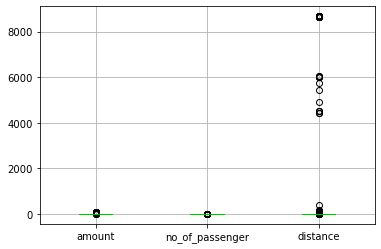

In [100]:
df.boxplot(column=['amount','no_of_passenger','distance'])
plt.show()

In [101]:
# verify the records where distance is <=0
df [df['distance'] <=0 ]

,Unnamed: 0,amount,no_of_passenger,distance,year,month,day,hour
11,11,5.5,3,0.0,2012,12,24,11
15,15,5.0,1,0.0,2013,11,23,12
26,26,6.5,1,0.0,2011,2,7,20
105,105,52.0,1,0.0,2009,3,25,0
124,124,8.0,2,0.0,2013,1,17,17
...,...,...,...,...,...,...,...,...
49816,49816,4.9,1,0.0,2012,2,20,0
49845,49845,6.6,3,0.0,2009,3,2,21
49856,49856,10.9,5,0.0,2010,4,19,17
49967,49967,20.5,1,0.0,2014,6,9,21


In [102]:
# Remove invalie records in wihch distance is updated as <=0
df = df[df['distance'] > 0]
df = df[df['distance'] <=150]

In [103]:
df.describe()

,Unnamed: 0,amount,no_of_passenger,distance,year,month,day,hour
count,48278.000000,48278.000000,48278.000000,48278.000000,48278.000000,48278.000000,48278.000000,48278.000000
mean,24985.507892,11.337354,1.676229,3.419001,2011.744521,6.277642,15.672604,13.484921
std,14430.529646,9.337891,1.290501,4.289822,1.869120,3.460124,8.659049,6.505293
min,0.000000,0.010000,1.000000,0.000084,2009.000000,1.000000,1.000000,0.000000
25%,12474.250000,6.000000,1.000000,1.288286,2010.000000,3.000000,8.000000,9.000000
50%,24983.500000,8.500000,1.000000,2.187072,2012.000000,6.000000,16.000000,14.000000
75%,37481.750000,12.500000,2.000000,3.975366,2013.000000,9.000000,23.000000,19.000000
max,49998.000000,100.000000,6.000000,129.950482,2015.000000,12.000000,31.000000,23.000000


<function matplotlib.pyplot.show(close=None, block=None)>

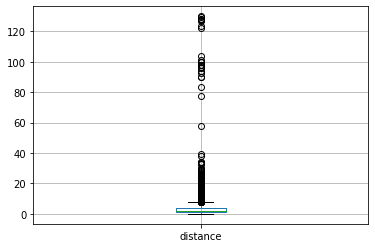

In [104]:
df.boxplot(column='distance')
plt.show

<h2> Build a model

In [105]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [106]:
df.head()

,Unnamed: 0,amount,no_of_passenger,distance,year,month,day,hour
0,0,4.5,1,1.030764,2009,6,15,17
1,1,16.9,1,8.450134,2010,1,5,16
2,2,5.7,2,1.389525,2011,8,18,0
3,3,7.7,1,2.799270,2012,4,21,4
4,4,5.3,1,1.999157,2010,3,9,7


In [107]:
#df=df.drop('year',axis=1)
#df=df.drop('month',axis=1)
#df=df.drop('day',axis=1)

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48278 entries, 0 to 49998
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       48278 non-null  int64  
 1   amount           48278 non-null  float64
 2   no_of_passenger  48278 non-null  int64  
 3   distance         48278 non-null  float64
 4   year             48278 non-null  int64  
 5   month            48278 non-null  int64  
 6   day              48278 non-null  int64  
 7   hour             48278 non-null  int64  
dtypes: float64(2), int64(6)
memory usage: 3.3 MB


In [109]:
df.shape

(48278, 8)

In [110]:
# Get independent (x) and dependent variable (y) details
x=df.drop(['amount'],axis=1)
y=df[['amount']]

In [111]:
# do train and test split of the data
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30,random_state=1)

In [112]:
#standradize the values to ensure all indpendent variable are on the same scale 
standardized_x = StandardScaler().fit_transform(x_train)

In [113]:
# fit a model on train data using standradized data
model=LinearRegression()
model.fit(standardized_x,y_train)

LinearRegression()

In [114]:
# measure the model performance on training data ( R2 Score)
model.score(standardized_x,y_train)  

0.5609808286146084

In [115]:
# standradize the independent variable test data set
standardized_test_x = StandardScaler().fit_transform(x_test)

In [116]:
# verify the model performance on test data ( R2 Score)
model.score(standardized_test_x,y_test)

0.5933419530973804

<b> Model performance on both test and train data is consistent although there is a scope for improvement hence this could be a reasonably a better model

<h2> SVM Model Building

In [117]:
 from sklearn import svm

In [118]:
regr = svm.SVR()

In [119]:
# Fit the model using train data
regr.fit(standardized_x, y_train)

C:\Users\rajku\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [120]:
# measure the model score on train data
regr.score(standardized_x,y_train)

0.8074515968471185

In [121]:
# Measure the model on test data
regr.score(standardized_test_x, y_test)

0.7977572917683173

<b> Conclusion is SVM model performance is better than Simple Linear Regression model

## Decision Tree Regressor

In [122]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt



In [123]:
# Build decison tree model with the depth = 2
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_1.fit(standardized_x, y_train)
score = regr_1.score(standardized_x, y_train)
print("Decision Tree with depth 2 score on taining data is",score)

Decision Tree with depth 2 score on taining data is 0.7394221549518913


In [124]:
# Measure the score against test data set
score = regr_1.score(standardized_test_x, y_test)
print("Decision Tree with depth 2 score on test data is",score)

Decision Tree with depth 2 score on test data is 0.7275577592893779


<b> Building decision tree with max depth = 30

In [125]:
# Build decison tree model with the depth = 30
regr_2 = DecisionTreeRegressor(max_depth=30, random_state=123)
regr_2.fit(standardized_x, y_train)
print("Decision Tree with depth 30 score on taining data is",score)

Decision Tree with depth 30 score on taining data is 0.7275577592893779


In [126]:
# with Max depth = 30, the score on test data is 
score = regr_2.score(standardized_test_x, y_test)
score

0.587575611410842

<b>when the decision is built with max depth =30 it seem to have overfit the data and hence the score is low on test data
so we need to find what  is the optimum depth that must be used, GridSearch helps to find it

In [127]:
from sklearn.model_selection import GridSearchCV
g_cv = GridSearchCV(DecisionTreeRegressor(random_state=0),
              param_grid={'max_depth': range(1, 10)},
             cv=5, refit=True)

g_cv.fit(standardized_x, y_train)
print("The optimum max depth is : ")
g_cv.best_params_



The optimum max depth is : 


{'max_depth': 6}

In [128]:
# with max depth = 5 the score on train data is 
regr_1 = DecisionTreeRegressor(max_depth=6)
regr_1.fit(standardized_x, y_train)
score = regr_1.score(standardized_x, y_train)
print("Decision Tree with depth 2 score on taining data is",score)

Decision Tree with depth 2 score on taining data is 0.8307103392424267


In [129]:
# with max depth = 5 the score on test data is 
regr_1 = DecisionTreeRegressor(max_depth=6)
regr_1.fit(standardized_test_x, y_test)
score = regr_1.score(standardized_test_x, y_test)
print("Decision Tree with depth 2 score on test data is",score)

Decision Tree with depth 2 score on test data is 0.8431105607886888


<b> Random Forest Model

In [130]:
from sklearn.ensemble import RandomForestRegressor

In [131]:
rnd_reg = RandomForestRegressor(n_estimators=100,max_depth=6, n_jobs = 1)

In [132]:
rnd_reg.fit(standardized_x,y_train)

<ipython-input-132-f9464bf5f8d6>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rnd_reg.fit(standardized_x,y_train)


RandomForestRegressor(max_depth=6, n_jobs=1)

In [133]:
# R2 score
rnd_reg.score(standardized_x,y_train) 

0.8401209758317314

In [134]:
# R2 score on test
rnd_reg.score(standardized_test_x,y_test) 

0.8121974166591652

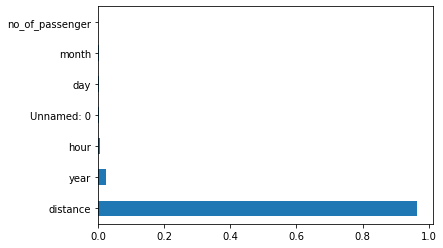

In [135]:
# verify the importance of the feature that contribute towards prediction
feat_importances = pd.Series(rnd_reg.feature_importances_, index=x_train.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

<b> Boosting

In [136]:
from sklearn.ensemble import GradientBoostingRegressor

In [137]:
# Build Boosting model ( R2)
gbmodel = GradientBoostingRegressor(max_depth=6, n_estimators=100, learning_rate=1.0)
gbmodel.fit(standardized_x,y_train)
gbmodel.score(standardized_x,y_train)

C:\Users\rajku\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9583077356667897

In [138]:
# Veify test data set score ( R2)
gbmodel.score(standardized_test_x,y_test)

0.6654902054903034